In [ ]:
from imperio import TargetImputationTransformer
from sklearn.pipeline import Pipeline


# pipe = Pipeline([
#     ('target', TargetImputationTransformer(index = [1, 12])),
#     ('model', LogisticRegression())
# ])

# pipe.fit(x_train, y_train)

# # Preprocessing of validation data, get predictions
# preds = pipe.predict(x_test)
target = TargetImputationTransformer(index = [12], reg = False)
target.fit(x_train, y_train)
trans = target.transform(x_test)

trans

In [ ]:
from datetime import datetime
def replace_date(data):
    return int(data[:4])
data["Date"] = data["Date"].apply(replace_date)
data

In [171]:
import numpy as np
import pandas as pd

In [172]:
data = pd.read_csv("avocado.csv")
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [174]:
for col in data:
    print(col, " \n\n", data[col].value_counts(), " \n\n")

Unnamed: 0  

 0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64  


Date  

 2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64  


AveragePrice  

 1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Le

In [175]:
def replace_type(data):
    data['type'].replace('conventional', 0, inplace=True)
    data['type'].replace('organic', 1, inplace=True)
    return data
data = replace_type(data)
data

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
0       48.16     8696.87     8603.62       93.25          0.0     0  2015   
1       58.33     9505.56     9408.07       97.49          0.0     0  2015   
2      130.50     8145.35     8042.21      103.14          0.0     0  2015   
3       72.58     5811.16     5677.40      133.76          0.0     0  2015   
4       75.78     6183.95     5986.26      197.69          0.0     0  2015   
...       ...         ...         ...         ...          ...   ...   ...   
18244    0.00    13498.67    13066.82      431.85          0.0     1  2018   
18245    0.00     9264.84     8940.04      324.80          0.0     1  2018   
18246  727.94     9394.11     9351.80       42.31          0.0     1  2018   
18247  727.01    10969.54    10919.54       50.00          0.0     1  2018   
18248  224.53    12014.15    11988.14       26.01          0.0     1  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 14 columns]

In [176]:
data.duplicated().sum()

0

In [177]:
data.isnull().sum() 

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [178]:
data.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               type          year  
count  18249.000000  18249.000000  
mean       0.499918   2016.147899  
std        0.500014      0.939938  
min        0.000000   2015.000000  
25%        0.000000   2015.000000  
50%        0.000000   2016.000000  
75%        1.000000   2017.000000  
max        1.000000   2018.000000

<AxesSubplot:>

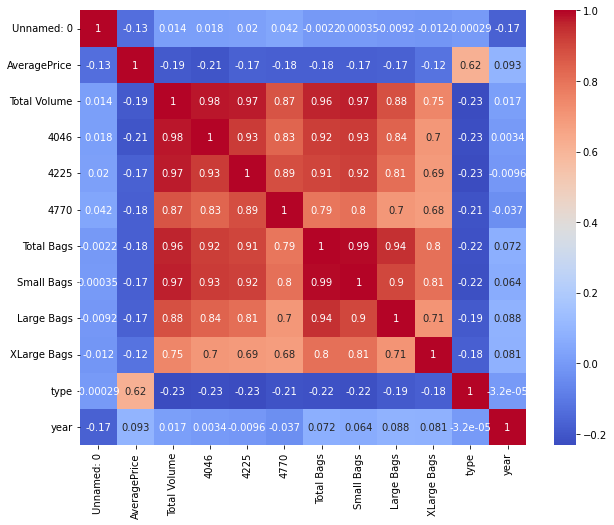

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))

sns.heatmap(data.corr(), annot = True, cmap='coolwarm')

In [180]:
data.drop(columns=['Date','region'],inplace=True)
pvalue_data = data.copy()

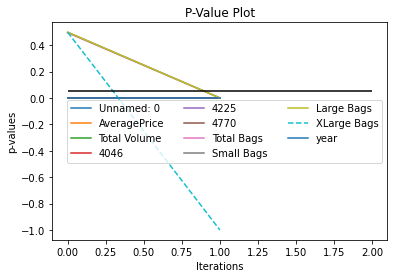

In [181]:
from kydavra import PValueSelector
pvalue_selector = PValueSelector()
selected_columns = pvalue_selector.select(pvalue_data, "type")
pvalue_selector.plot_process()


In [182]:
pvalue_data.drop(columns=['XLarge Bags'],inplace=True)

In [183]:
pvalue_data

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  type  year  
0         8696.87     8603.62       93.25     0  2015  
1         9505.56     9408.07       97.49     0  2015  
2         8145.35     8042.21      103.14     0  2015  
3         5811.16     5677.40      133.76     0  2015  
4         6183.95     5986.26      197.69     0  2015  
...           ...         ...         ...   ...   ...  
18244    13498.67    13066.82      431.85     1  2018  
18245     9264.84     8940.04      324.80     1  2018  
18246     9394.11     9351.80       42.31     1  2018  
18247    10969.54    10919.54       50.00     1  2018  
18248    12014.15    11988.14       26.01     1  2018  

[18249 rows x 11 columns]

In [184]:
from sklearn.model_selection import train_test_split
def evaluate(data):
    X = data.drop("type", axis = 1)
    y = data.type
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    logreg = LogisticRegression()
    logreg.fit(x_train,y_train)
    y_pred=logreg.predict(x_test)
    print(accuracy_score(y_pred, y_test))

    from sklearn import metrics
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
evaluate(pvalue_data)

0.9375342465753425
[[2459  279]
 [  63 2674]]


In [185]:
from kydavra import PointBiserialCorrSelector
point_data = data.copy()
point_biserial = PointBiserialCorrSelector()
slected_columns = point_biserial.select(point_data, "type")
print(slected_columns)
#Again the same result as th previous

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags']


In [193]:
from kydavra import PearsonCorrelationSelector
pearson_data = data.copy()
pearson = PearsonCorrelationSelector()
slected_columns = pearson.select(point_data, "type")
print(slected_columns)
pearson_data.drop(columns = ['year','Total Volume', 'Total Bags','Unnamed: 0','Small Bags','Large Bags','XLarge Bags',"4046","4225","4770"], inplace =True)
evaluate(pearson_data)

['AveragePrice']
0.7990867579908676
[[2217  521]
 [ 579 2158]]
